<a href="https://colab.research.google.com/github/brianMutea/Kangas-Image-data-for-CV-tasks/blob/main/Image_data_with_Kangas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# %pip install kangas
# %pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 35.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 18.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 979.5 kB/s eta 0:0

In [ ]:
import kangas as kg
from kangas import DataGrid, Image

import PIL
from PIL import Image

from pathlib import Path
import os
import os.path

# Creating Images on DataGrid

We store the image using the [`Image()`](https://github.com/comet-ml/kangas/wiki/Image) class. The class has various arguments we can pass:
  <pre> `class Image(data=None,
             name=None,
             format="png",
             scale=1.0,
             shape=None,
             colormap=None,
             minmax=None,
             channels="last",
             metadata=None,
             source=None,
             unserialize=False,
             color_order="rgb")`</pre>

We can also store images in a DataGrid by using Python Imaging Library (PIL) image.

In [ ]:
! unzip '/content/cats-dogs.zip'

Archive:  /content/cats-dogs.zip
  inflating: cats-dogs/cat_1.jpeg    
  inflating: cats-dogs/cat_2.jpeg    
  inflating: cats-dogs/cat_3.jpeg    
  inflating: cats-dogs/dog_1.jpeg    
  inflating: cats-dogs/dog_2.jpeg    
  inflating: cats-dogs/dog_3.jpeg    


TYPE OF IMAGE:  <class 'kangas.datatypes.image.Image'>



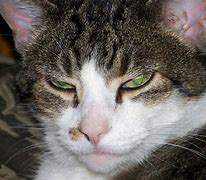

In [ ]:
image = kg.Image('/content/cats-dogs/cat_1.jpeg')
print('TYPE OF IMAGE: ', type(image))
print()
image.show()

In [ ]:
image = kg.Image('/content/cats-dogs/cat_1.jpeg', name='cat.jpeg', format='jpeg')
dg = kg.DataGrid(name='Cat')
dg.extend([{'image': image}])

In [ ]:
dg.show()

<IPython.core.display.Javascript object>

TYPE OF IMAGE:  <class 'PIL.JpegImagePlugin.JpegImageFile'>



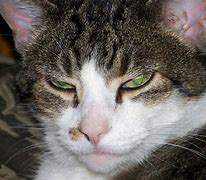

In [ ]:
image = kg.Image('/content/cats-dogs/cat_1.jpeg').to_pil()
print('TYPE OF IMAGE: ', type(image))
print()
image.show()

## Load Image as a numpy matrix

Type of data: <class 'numpy.ndarray'> data:  of Shape: (180, 206, 3)
TYPE OF IMAGE:  <class 'PIL.JpegImagePlugin.JpegImageFile'>



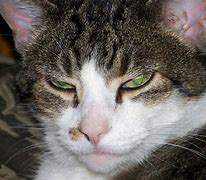

In [ ]:
from numpy import asarray

numpy_img_data = asarray(image)

print(f"Type of data: {type(numpy_img_data)} data:  of Shape: {numpy_img_data.shape}")

print('TYPE OF IMAGE: ', type(image))
print()
image.show()

## Load Image as a TEnsorFlow Tensor

Type of data: <class 'tensorflow.python.framework.ops.EagerTensor'> data:  of Shape: (180, 206, 3)
TYPE OF IMAGE:  <class 'PIL.JpegImagePlugin.JpegImageFile'>



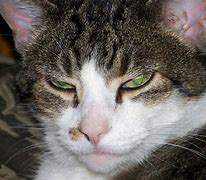

In [ ]:
import tensorflow as tf

tensor_img_data = tf.convert_to_tensor(image)
print(f"Type of data: {type(tensor_img_data)} data:  of Shape: {tensor_img_data.shape}")

print('TYPE OF IMAGE: ', type(image))
print()
image.show()

### More images

In [129]:
import glob

#instantiate DataGrid
dg = DataGrid(name="Images", columns=["image_file_path", "image", 'height', 'width', "label"])

# append data to DataGrid
for file in glob.iglob("/*/*/*.jpeg"):
  file_name = os.path.basename(file) # file_name to metadata
  image = Image.open(file)
  image_w = image.width
  image_h = image.height
  label = os.path.splitext(file_name)[0][:3]
  dg.append([file, kg.Image(file, name=file_name), image_w, image_h, label])

dg.show()

<IPython.core.display.Javascript object>



![more_imgs](https://drive.google.com/uc?export=view&id=1yoeupTRJN386IGC4QlW6DntK5HCmP3Wu)

# Adding Image Metadata

## Adding Bounding Boxes with Kangas

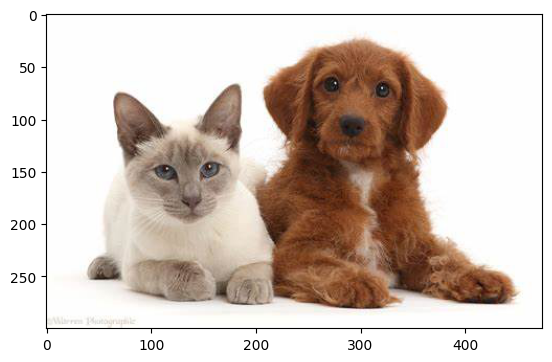

In [ ]:
import matplotlib.pyplot as plt
img2_aug = kg.Image('/content/cat_dog.jpg').to_pil() # rem include .to_pil() here to view with plt

plt.imshow(img2_aug)

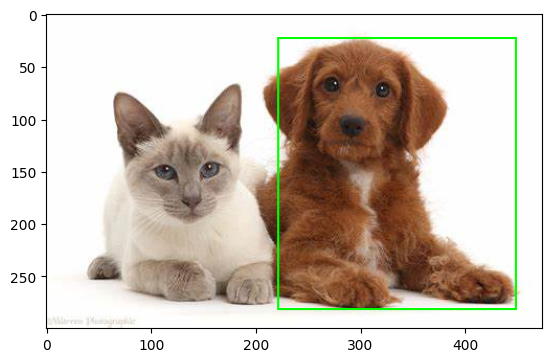

In [ ]:
# image = kg.Image('/content/cat_dog.jpg')
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage

img2_aug_numpy =  asarray(img2_aug)
# cat = (x1=40, x2=210, y1=65, y2=280)
# dog = (x1=222, x2=448, y1=23, y2=281)
bbs = BoundingBoxesOnImage([BoundingBox(x1=222, x2=448, y1=23, y2=281)], shape=img2_aug_numpy.shape)

plt.imshow(bbs.draw_on_image(img2_aug_numpy, size=2))

dgt = kg.DataGrid()

dgt.extend([[img2_aug]])

In [ ]:
img2_aug = kg.Image('/content/cat_dog.jpg', name='cat_dog.jpg')

Now with Kangas...

In [ ]:
box1 = [(40, 65), (210, 280)]
box2 = [(222, 23),(448, 281)]
imgs_bbox = img2_aug.add_bounding_boxes("Cat", box1, score=0.89, layer_name="Truth", id='cat01')
imgs_bbox = img2_aug.add_bounding_boxes("Dog", box2, score=0.89, layer_name="Truth", id='dog01')

In [ ]:
img_dg = kg.DataGrid(name='cat_dog')
img_dg.extend([{'image':imgs_bbox}])

In [131]:
img_dg.show()

<IPython.core.display.Javascript object>

![bboxes](https://drive.google.com/uc?export=view&id=12YpL0JLchpbyABPwVdSZOjfv_CBRTQwo)

## Adding Image mask

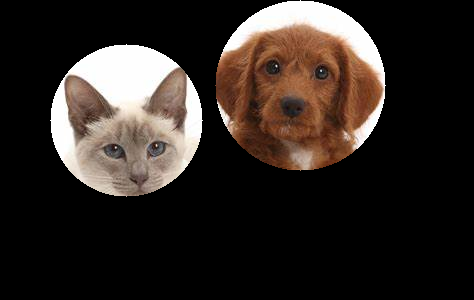

3


In [106]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


# Load image, create mask, and draw white circle on mask
image = cv2.imread('/content/cat_dog.jpg')
mask = np.zeros(image.shape, dtype=np.uint8)
cat_mask = cv2.circle(mask, (126, 120), 76, (255,255,255), -1) 
dog_mask = cv2.circle(mask, (300, 85), 85, (255,255,255), -1) 
# Mask input image with binary mask
result = cv2.bitwise_and(image, cat_mask)
result = cv2.bitwise_and(image, dog_mask)
# Color background white
# result[mask==0] = 255 # Optional

# cv2_imshow(image)
# cv2_imshow(mask)
cv2_imshow(result)
cv2.waitKey()

print(result.ndim)

In [128]:
image = kg.Image('/content/cat_dog.jpg')
mask = PIL.Image.open('/content/mask_truth.png')
image.add_mask({1: 'Cat_vs_dog'}, mask, layer_name='Truth')
dg = kg.DataGrid(name="model1")
dg.append([image])
dg.show()

<IPython.core.display.Javascript object>

![masks](https://drive.google.com/uc?export=view&id=1CiKYJ6QjQa7dL9T_OboPKslZnYIyC3Tq)

2


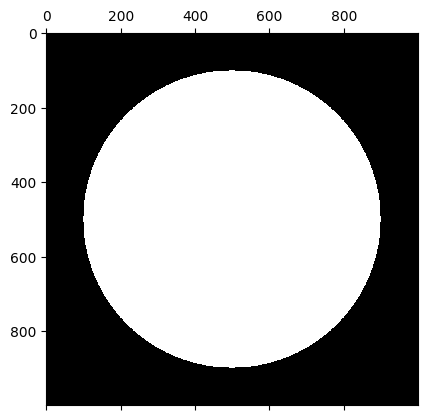

In [121]:
import matplotlib.pyplot as plt
import numpy as np

x_ = np.linspace(-10, 10, 1000)
y_ = np.linspace(-10, 10, 1000)

X, Y = np.meshgrid(x_, y_)

radius = 8
disk_mask = (X ** 2) + (Y ** 2) < radius ** 2
print(disk_mask.ndim)
plt.matshow(disk_mask, cmap="gray")
plt.show()

# Loading Hugging face datasets

In [ ]:
import datasets
from datasets import load_dataset ,Image


In [ ]:
licence_plate_dataset = load_dataset('keremberke/license-plate-object-detection', 'full', split='train[:20]')

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset license-plate-object-detection downloaded and prepared to /root/.cache/huggingface/datasets/keremberke___license-plate-object-detection/full/1.0.0/e7740c5ed939eb2184b6f17aee84b3a304e2f46f093835a839bcf19f0ca38ce4. Subsequent calls will reuse this data.


In [ ]:
licence_plate_dataset

Dataset({
    features: ['image_id', 'image', 'width', 'height', 'objects'],
    num_rows: 20
})

In [ ]:
dg_obj_detection = kg.DataGrid(licence_plate_dataset, name='Licence_plate_obj_detection')




  0%|          | 0/20 [00:00<?, ?it/s]


  5%|▌         | 1/20 [00:00<00:03,  5.92it/s]


 15%|█▌        | 3/20 [00:00<00:01,  8.68it/s]


 25%|██▌       | 5/20 [00:00<00:01, 10.60it/s]


 40%|████      | 8/20 [00:00<00:00, 14.63it/s]


 55%|█████▌    | 11/20 [00:00<00:00, 18.72it/s]


 70%|███████   | 14/20 [00:00<00:00, 21.45it/s]


 85%|████████▌ | 17/20 [00:00<00:00, 23.72it/s]


100%|██████████| 20/20 [00:01<00:00, 18.59it/s]


In [130]:
dg_obj_detection.show()

<IPython.core.display.Javascript object>


![licence_plates](https://drive.google.com/uc?export=view&id=1nb4fplffft_w4LDyVqzBsuVIG-kYzu1O)

# Aside...

In [ ]:
import json

In [ ]:
bboxs = []

licence_plate_dataset[0]['objects']

def get_bounding_boxes(data):
  for meta_object in data['objects']:
    for key, val in meta_object.items():
      if key == 'bbox':
        for i in val:
          bboxs.append(i)
  return bboxs

In [ ]:
def add_bounding_boxes(data):
  for box in get_bounding_boxes(data):
    data['imgs_with_bbox'] = [(kg.Image(image, format='JPEG')).add_bounding_boxes('Plate', box, layer_name='Truth' ) for image in data["image"]]

  return data

In [ ]:
# transforms(licence_plate_dataset)

# licence_plate_dataset = licence_plate_dataset.map(add_bounding_boxes, batched=True, remove_columns=['image'])

In [ ]:
annotations = licence_plate_dataset[0]['objects']

annotations, type(annotations)

({'id': [5570],
  'area': [3750],
  'bbox': [[228.0, 226.0, 125.0, 30.0]],
  'category': [0]},
 dict)

In [ ]:
%pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"brianmutea","key":"8f0efcc0d2127c06bcb1c9ca4ce91856"}'}

In [ ]:
! mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d samuelcortinhas/cats-and-dogs-image-classification -p Dataset 

 90% 58.0M/64.4M [00:00<00:00, 124MB/s]
100% 64.4M/64.4M [00:00<00:00, 128MB/s]


In [ ]:
# !unzip '/content/Dataset/cats-and-dogs-image-classification.zip'

In [ ]:
train_dir = '/content/train'

class_names = sorted(os.listdir(train_dir))

print(f"Class Names : {class_names}")

Class Names : ['cats', 'dogs']


In [ ]:
train_dir_cats = train_dir + '/cats' #storing the cats training images
train_dir_dogs = train_dir + '/dogs' #storing the dogs training images

In [ ]:
train_dir_cats

'/content/train/cats'

In [ ]:
cat_dir = os.path.join('/content/train/cats')
dog_dir = os.path.join('/content/train/dogs')

In [ ]:
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

In [ ]:
pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
              for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
              for fname in dog_names[pic_index-8:pic_index]]

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


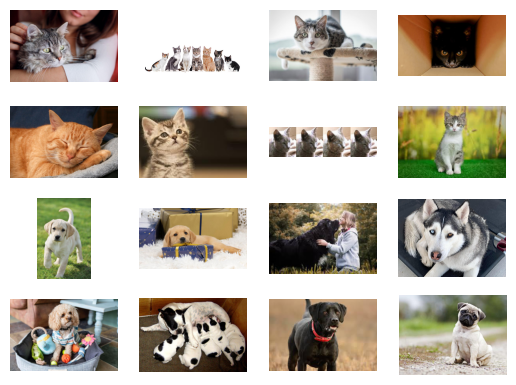

In [ ]:
for i, img_path in enumerate(cat_images + dog_images):
    sp = plt.subplot(4, 4, i+1)
    sp.axis('Off')
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
plt.show()